In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Cargando Datos

In [2]:
import zipfile
with zipfile.ZipFile('valoracion_aerolineas.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [3]:
# Cargando ambos data sets por separado
df_train = pd.read_csv('/content/dataset/train.csv')
df_test = pd.read_csv('/content/dataset/test.csv')

In [4]:
# Mostrando las columnas del dataset
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [6]:
df_final = pd.concat([df_train, df_test], ignore_index=True)
df_final

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [7]:
# Limpiamos los datos
df_final = df_final.dropna()
df_final

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [8]:
df_final.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,44158.973480,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,31209.526335,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16230.000000,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38966.000000,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71440.500000,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df_final.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Selección de columnas para trabajar

In [10]:
drop_columns = ['Unnamed: 0', 'id']
data = df_final.drop(drop_columns, axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
# data set con valores continuos
data_transformed = data.copy()

# Aplicar Label Encoding a las columnas categóricas
label_encoder = LabelEncoder()
for column in data_transformed.select_dtypes(include=['object']).columns:
    data_transformed[column] = label_encoder.fit_transform(data_transformed[column])
    
data_transformed

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
129876,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
129877,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
129878,1,0,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


# 
# 
# 
# 
# 
# 

#  

# FEATURES

In [12]:
# Gráfico de torta
def pie_chart(data_column, axes, title):
    column_count = data_column.value_counts()
    axes.pie(column_count, labels=column_count.index, autopct='%1.0f%%', colors=sns.color_palette('viridis', len(column_count)))
    axes.axis('equal')
    axes.set_title(title)

def bar_chart(df, column, hue, xlabel, title, axes):
    sns.countplot(ax=axes, data=df, x=column, hue=hue, palette='viridis')
    axes.set_xlabel(xlabel)
    axes.set_ylabel("Cantidad")
    axes.set_title(title)

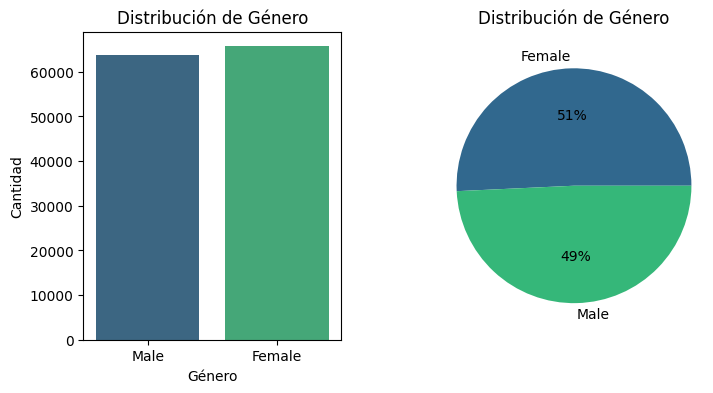

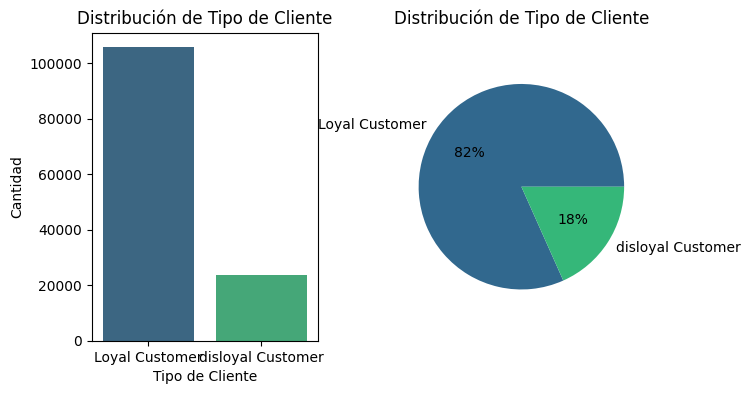

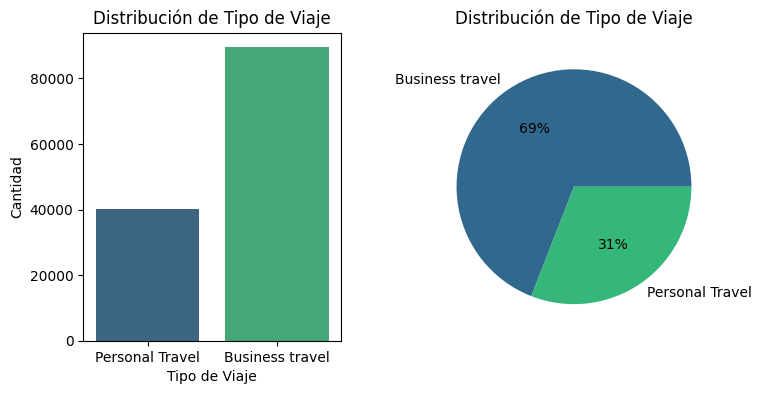

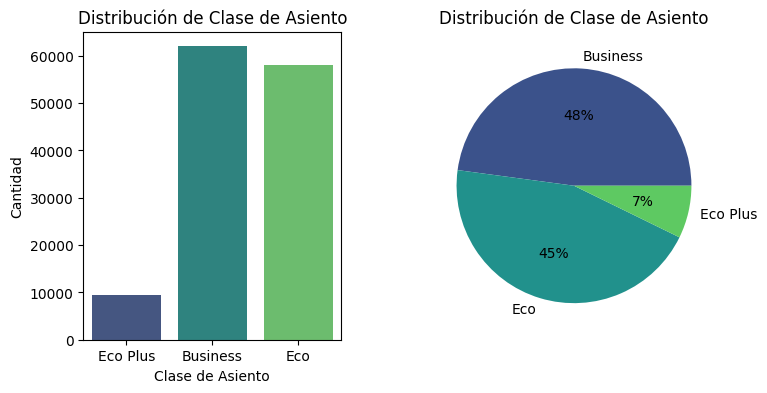

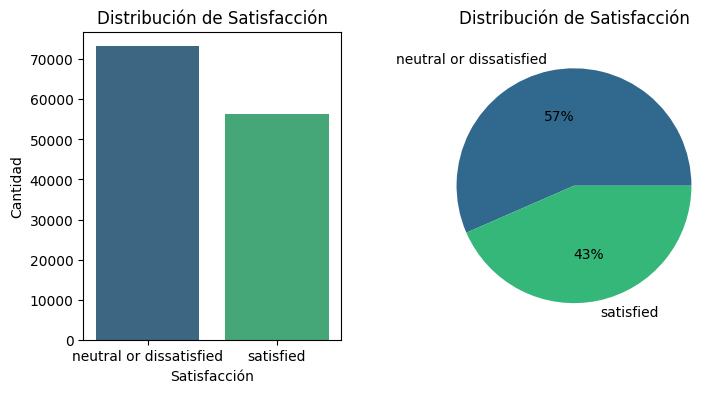

In [13]:
# Visualización de Género
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
pie_chart(data['Gender'], axes[1],"Distribución de Género")
bar_chart(data,'Gender',data['Gender'],'Género', "Distribución de Género",axes[0])
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Tipo de Cliente
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
bar_chart(data,'Customer Type',data['Customer Type'],'Tipo de Cliente', "Distribución de Tipo de Cliente",axes[0])
pie_chart(data['Customer Type'], axes[1], "Distribución de Tipo de Cliente")
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Tipo de Viaje
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
bar_chart(data,'Type of Travel',data['Type of Travel'],'Tipo de Viaje', "Distribución de Tipo de Viaje",axes[0])
pie_chart(data['Type of Travel'], axes[1], "Distribución de Tipo de Viaje")
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Clase de Asiento
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
bar_chart(data,'Class',data['Class'],'Clase de Asiento', "Distribución de Clase de Asiento",axes[0])
pie_chart(data['Class'], axes[1], "Distribución de Clase de Asiento")
plt.subplots_adjust(wspace=0.4)
plt.show()

# Visualización de Nivel de Satisfacción
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
bar_chart(data,'satisfaction',data['satisfaction'],'Satisfacción', "Distribución de Satisfacción",axes[0])
pie_chart(data['satisfaction'], axes[1], "Distribución de Satisfacción")
plt.subplots_adjust(wspace=0.4)
plt.show()

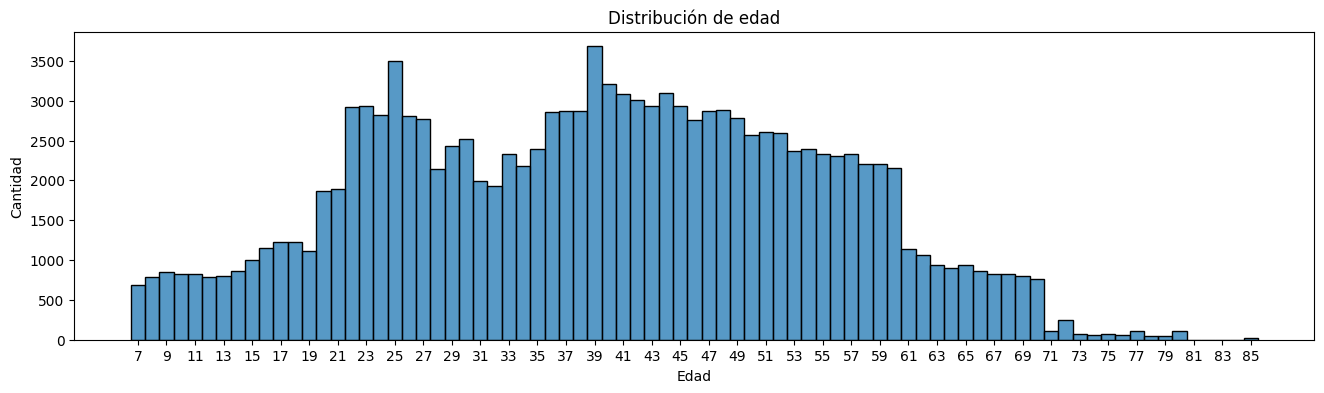

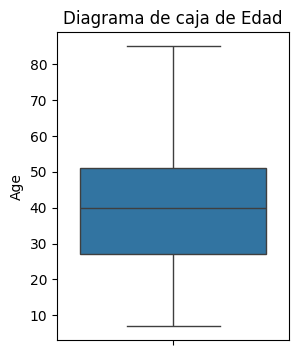

In [14]:
#Histograma de la columna edad
plt.figure(figsize=(16, 4))
sns.histplot(data=data, x='Age', discrete=True)
plt.title("Distribución de edad")
plt.xlabel("Edad")
plt.xticks(range(int(data['Age'].min()), int(data['Age'].max())+1, 2))
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(data["Age"]);
plt.title("Diagrama de caja de Edad");
plt.show()

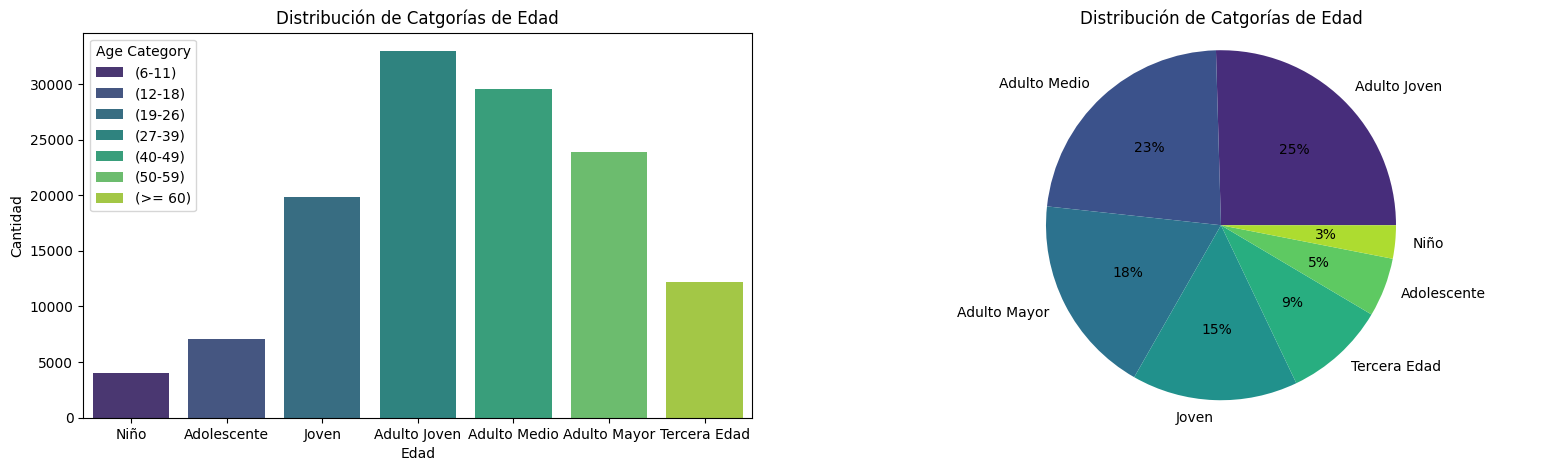

In [15]:
bins = [5, 11, 18, 26, 39, 49, 59, 120]
categories = {
    'Niño':'(6-11)',
    'Adolescente':'(12-18)',
    'Joven':'(19-26)',
    'Adulto Joven':'(27-39)',
    'Adulto Medio':'(40-49)',
    'Adulto Mayor':'(50-59)',
    'Tercera Edad':'(>= 60)'
}
data_new_features = pd.DataFrame(data)
data_new_features['Age Category'] = pd.cut(data_new_features['Age'], bins=bins, labels=categories.keys(), right=True)

#Visualización del nuevo feature "Age Category"
fig, axes = plt.subplots(1, 2, figsize=(19, 5))

pie_chart(data_new_features['Age Category'], axes[1],"Distribución de Catgorías de Edad")
bar_chart(data_new_features,'Age Category',data_new_features['Age Category'].map(categories),'Edad',"Distribución de Catgorías de Edad",axes[0])

plt.show()

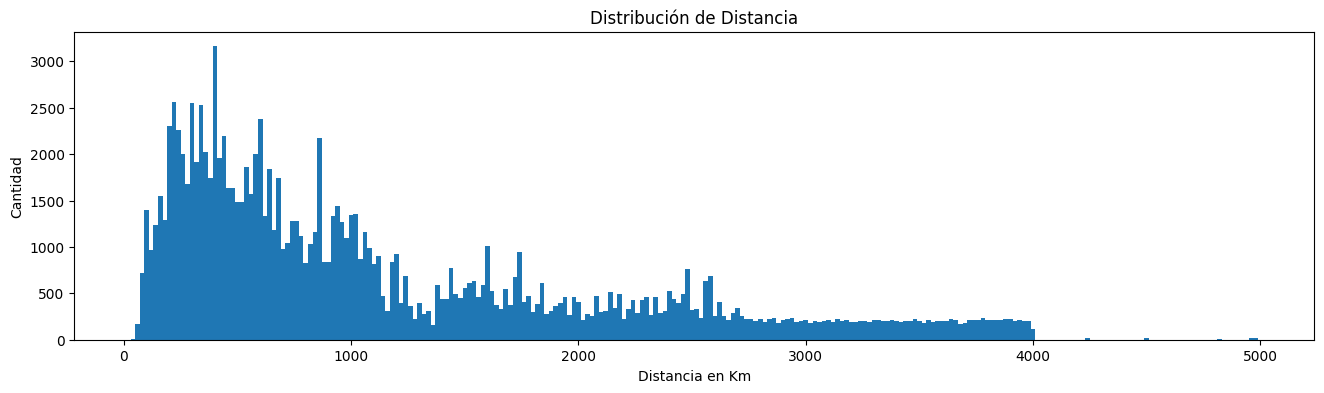

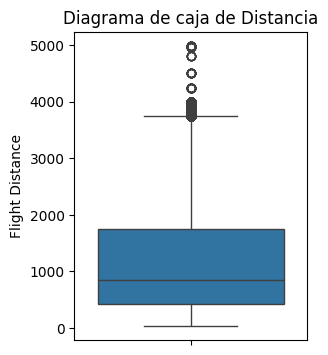

In [16]:
#Histograma de la columna distacia de vuelo en km

plt.figure(figsize=(16, 4))
bins = list(range(30,5000,20))
data["Flight Distance"].plot(kind="hist", width=20,bins=bins);
plt.title("Distribución de Distancia")
plt.xlabel("Distancia en Km")
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(data["Flight Distance"]);
plt.title("Diagrama de caja de Distancia");
plt.show()

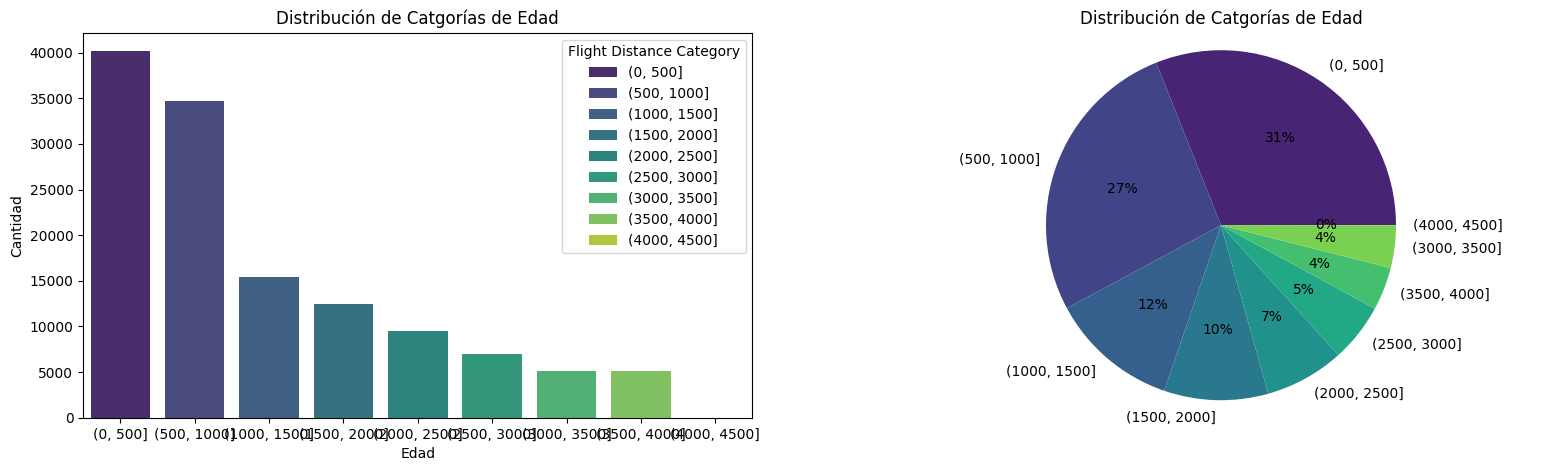

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Flight Distance Category
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,"(0, 500]"
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,"(0, 500]"
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,"(1000, 1500]"
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,"(500, 1000]"
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,"(0, 500]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,3,2,4,4,5,4,0,0.0,neutral or dissatisfied,"(500, 1000]"
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,5,5,5,5,4,0,0.0,satisfied,"(500, 1000]"
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,4,3,4,5,4,2,0,0.0,neutral or dissatisfied,"(500, 1000]"
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,3,2,5,4,5,4,0,0.0,satisfied,"(1000, 1500]"


In [17]:
bins = list(range(0,5000,500))
data_new_features = pd.DataFrame(data)
data_new_features['Flight Distance Category'] = pd.cut(data_new_features['Flight Distance'], bins=bins, right=True)

#Visualización del nuevo feature "Age Category"
fig, axes = plt.subplots(1, 2, figsize=(19, 5))

pie_chart(data_new_features['Flight Distance Category'], axes[1],"Distribución de Catgorías de Edad")
bar_chart(data_new_features,'Flight Distance Category',data_new_features['Flight Distance Category'],'Edad',"Distribución de Catgorías de Edad",axes[0])

plt.show()
data_new_features

c:\Users\ddcre\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


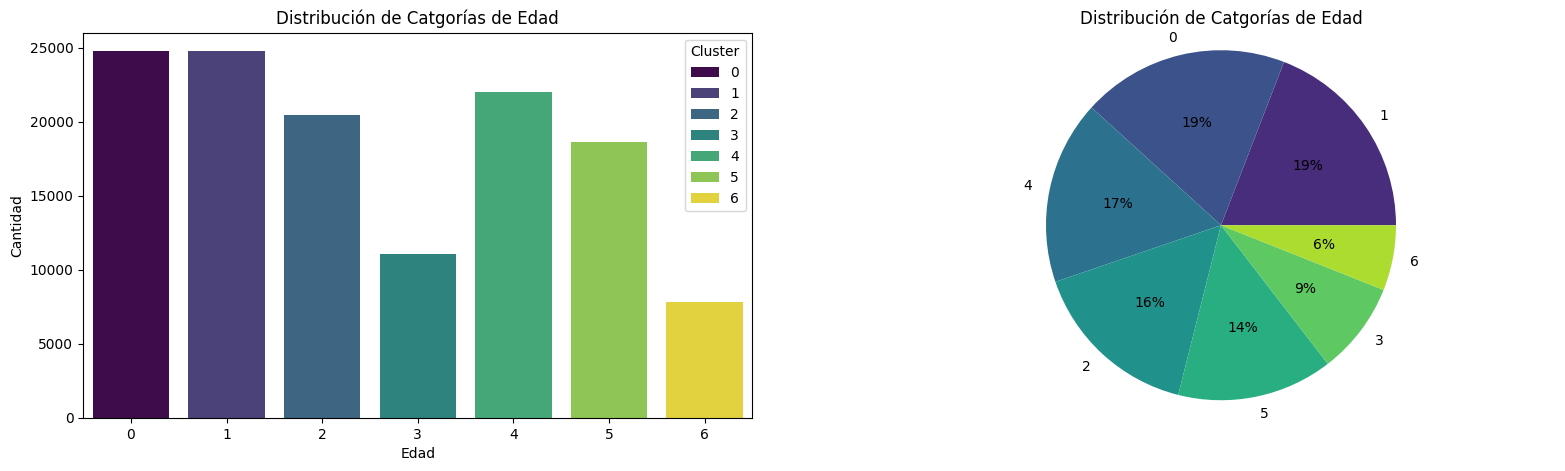

In [29]:
new_df = pd.DataFrame(data)
X = data[['Age']].values
k = 7
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
new_df['Cluster'] = kmeans.labels_

#Visualización del nuevo feature "Age Category"
fig, axes = plt.subplots(1, 2, figsize=(19, 5))

pie_chart(new_df['Cluster'], axes[1],"Distribución de Catgorías de Edad")
bar_chart(new_df,'Cluster',new_df['Cluster'],'Edad',"Distribución de Catgorías de Edad",axes[0])

plt.show()

In [31]:
new_df[new_df['Cluster'] == 0]['Age'].describe()

count    24757.000000
mean        40.495173
std          2.256950
min         37.000000
25%         39.000000
50%         40.000000
75%         42.000000
max         44.000000
Name: Age, dtype: float64

Gender
Female    65703
Male      63784
Name: count, dtype: int64
Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64
Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64
Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64


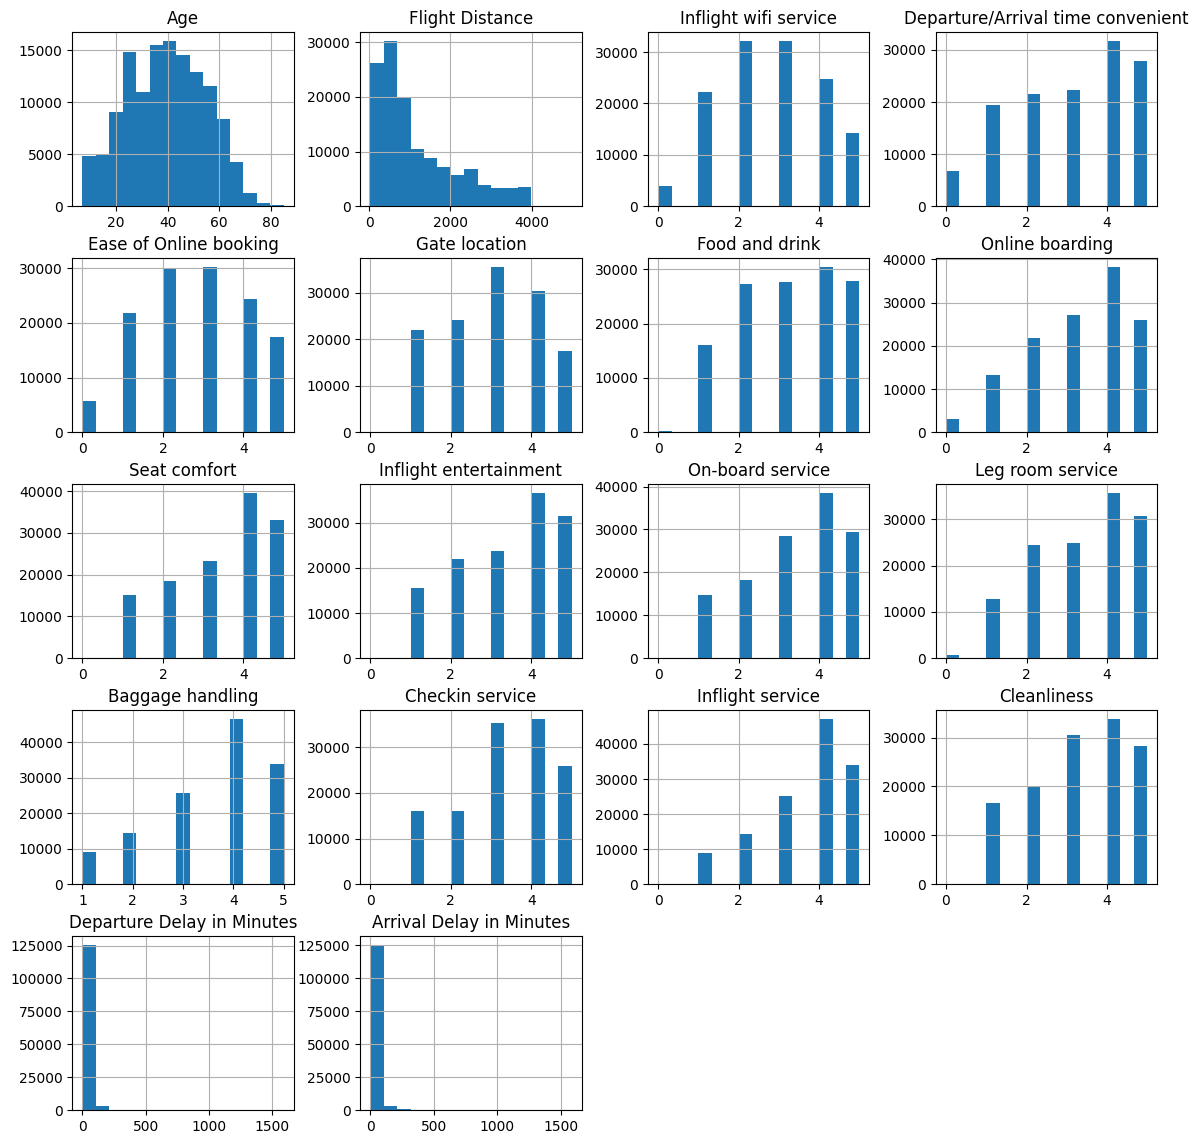

In [19]:
# Variables categóricas
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for column in categorical_columns:
    print(data[column].value_counts())

# Variables numéricas
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns].hist(bins=15, figsize=(14, 14))
plt.show()

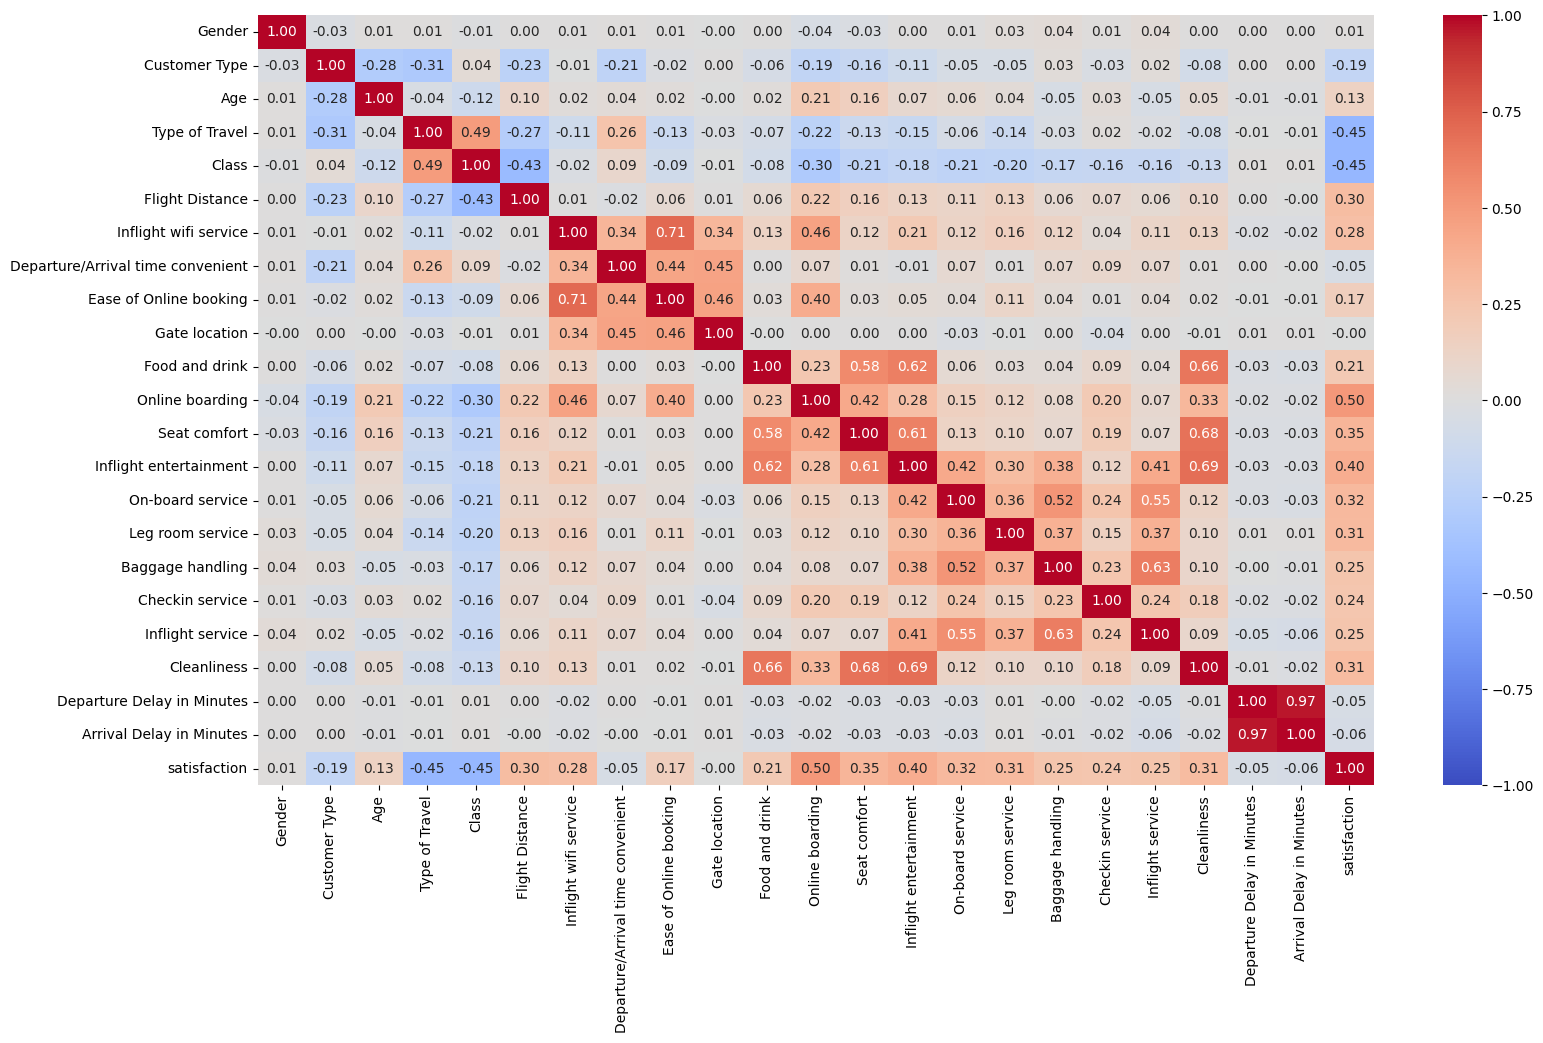

In [20]:
# Correlación genereal de toda la tabla

corr = data_transformed.corr()

plt.figure(figsize=(18, 10)) # Ajustar el tamaño del gráfico
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [21]:
data['Gender'].describe()
data['Customer Type'].describe()

count             129487
unique                 2
top       Loyal Customer
freq              105773
Name: Customer Type, dtype: object

# PREGUNTAS

### 1. ¿Cuál es el nivel general de satisfacción de los pasajeros?, ¿cuáles son los porcentajes?



### 2. ¿Cómo varía la satisfacción según el género de los pasajeros?

### 3. ¿Hay diferencias significativas según el grupo de edad?


4. ¿Qué diferencias existen en la satisfacción entre clientes leales y no leales?
5. ¿Cómo afecta el tipo de viaje (Personal vs. de Negocios) la satisfacción del pasajero?
6. ¿Qué servicios influyen más en la satisfacción general del pasajero (wifi, entretenimiento a bordo,
comodidad del asiento, etc.)?
7. ¿Cuáles son los servicios que satisfacen más y cuáles dejan más insatisfechos a la clase de
Negocios?
8. ¿Cómo afecta el retraso en la salida y llegada la satisfacción del pasajero?, ¿hay una correlación?
9. ¿Existen correlaciones significativas entre diferentes niveles de satisfacción?
10.¿Qué segmentos de clientes existen en base a demografía, tipo de cliente, tipo de viaje y clase?,
¿cuáles muestran mayores niveles de satisfacción? 